In [692]:
# importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import plotly.express as px

In [693]:
#cargar el dataset
df = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_extended.csv')

In [694]:
# Mostrar columna de datos
df.columns 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [695]:
print("Cantidad de filas y columnas del dataset:", df.shape)

Cantidad de filas y columnas del dataset: (9621, 79)


In [696]:
# Imprimir las primeras filas del dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,https://www.airbnb.com/rooms/96033,20250328164700,2025-03-29,city scrape,"Bonito piso a 200m de la playa, El Palo (Málaga)",Do you have a backpacker spirit and are lookin...,"200 metres from the beaches of El Palo, Malaga...",https://a0.muscache.com/pictures/hosting/Hosti...,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",¡Hola! Gracias por acercarte a nosotros y enca...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/59fb2...,https://a0.muscache.com/im/pictures/user/59fb2...,NaN,1,1,"['email', 'phone']",t,t,"Málaga, Andalusia, Spain",Este,NaN,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,1.0,1 bath,2.0,2.0,"[""High chair"", ""Coffee"", ""Conditioner"", ""Dishe...",$54.00,3,180,3,3,1125,1125,3.0,1125.0,NaN,t,14,37,48,259,2025-03-29,250,39,1,172,37,234,12636.0,2013-10-18,2025-03-01,4.60,4.71,4.61,4.88,4.93,4.43,4.59,VUT/MA/22043,f,1,1,0,0,1.79
1,166473,https://www.airbnb.com/rooms/166473,20250328164700,2025-03-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain","Hi All, my name is Fred and I am half Swedish ...",within a few hours,100%,72%,f,https://a0.muscache.com/im/pictures/user/f2d8a...,https://a0.muscache.com/im/pictures/user/f2d8a...,NaN,5,5,"['email', 'phone']",t,t,NaN,Este,NaN,36.720310,-4.361080,Private room in rental unit,Private room,1,2.0,2 shared baths,1.0,4.0,"[""Dryer"", ""Dishes and silverware"", ""Private en...",$22.00,5,365,5,5,365,1000,5.0,480.7,NaN,t,0,0,26,301,2025-03-29,101,4,0,214,6,40,880.0,2011-08-25,2025-02-11,4.72,4.60,4.50,4.83,4.91,4.80,4.72,NaN,f,5,1,4,0,0.61
2,330760,https://www.airbnb.com/rooms/330760,20250328164700,2025-03-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,"Dear guest,\nMy name is Mayte Moreno Higgins. ...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/1687526/profi...,https://a0.muscache.com/im/users/1687526/profi...,NaN,7,9,"['email', 'phone']",t,t,"Málaga, Andalusia, Spain",Centro,NaN,36.729786,-4.413462,Private room in townhouse,Private room,2,1.5,1.5 shared baths,1.0,1.0,"[""Coffee"", ""Paid dryer \u2013 In building"", ""L...",$51.00,1,1125,1,1,365,365,1.0,365.0,NaN,t,12,20,43,218,2025-03-29,60,5,

In [697]:
# Mostrar info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9621 non-null   int64  
 1   listing_url                                   9621 non-null   object 
 2   scrape_id                                     9621 non-null   int64  
 3   last_scraped                                  9621 non-null   object 
 4   source                                        9621 non-null   object 
 5   name                                          9621 non-null   object 
 6   description                                   9395 non-null   object 
 7   neighborhood_overview                         4309 non-null   object 
 8   picture_url                                   9621 non-null   object 
 9   host_id                                       9621 non-null   i

In [698]:
# Mostrar estadisticas del dataset
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.621000e+03,9.621000e+03,9.621000e+03,9621.000000,9621.000000,0.0,9621.000000,9621.000000,9621.000000,8709.000000,9432.000000,8713.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,0.0,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,8.711000e+03,8454.000000,8454.000000,8454.000000,8454.000000,8454.000000,8454.00000,8454.000000,9621.000000,9621.000000,9621.000000,9621.000000,8454.000000
mean,6.352695e+17,2.025033e+13,2.173691e+08,44.488203,57.686103,NaN,36.720323,-4.421476,3.931712,1.299001,1.653308,2.520142,3.412743,516.344351,3.307452,7.363268,609.841285,715.491425,4.690916,658.827170,NaN,8.782455,21.015383,35.774140,162.154142,46.334061,12.739840,0.867373,128.862384,12.490697,73.357343,9.183269e+03,4.643980,4.704578,4.676559,4.753339,4.775603,4.70260,4.575968,24.359526,22.736618,1.611267,0.010394,1.402359
std,5.262896e+17,0.000000e+00,1.946497e+08,103.064485,170.311611,NaN,0.013373,0.024403,2.152360,0.689794,1.188175,2.003346,12.882824,422.344335,11.741501,20.293986,461.078135,432.972397,12.532444,429.351501,NaN,8.821277,18.710625,29.285625,123.696936,79.124776,17.853952,1.535402,95.115935,18.178111,85.416576,2.908181e+04,0.426704,0.395428,0.411258,0.376787,0.365394,0.37019,0.440083,41.498793,41.380842,5.348812,0.274896,1.479701
min,9.603300e+04,2.025033e+13,4.555300e+04,1.000000,1.000000,NaN,36.646012,-4.582370,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.222275e+07,2.025033e+13,4.842949e+07,2.000000,2.000000,NaN,36.718342,-4.429060,2.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,2.000000,90.000000,365.000000,2.000000,365.000000,NaN,0.000000,1.000000,2.000000,36.000000,3.000000,1.000000,0.000000,26.000000,0.000000,6.000000,6.300000e+02,4.530000,4.630000,4.560000,4.690000,4.720000,4.59000,4.480000,2.000000,1.000000,0.000000,0.000000,0.350000
50%,7.731022e+17,2.025033e+13,1.420223e+08,8.000000,9.000000,NaN,36.722330,-4.422676,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,4.000000,365.000000,999.000000,2.900000,637.300000,NaN,7.000000,18.000000,34.000000,164.000000,15.000000,5.000000,0.000000,140.000000,5.000000,36.000000,3.696000e+03,4.750000,4.810000,4.790000,4.860000,4.880000,4.80000,4.670000,5.000000,4.000000,0.000000,0.000000,0.910000
75%,1.131138e+18,2.025033e+13,3.821465e+08,48.000000,58.000000,NaN,36.725450,-4.417670,5.000000,1.500000,2.000000,3.000000,3.000000,1125.000000,2.000000,5.000000,1125.000000,1125.000000,4.000000,1125.000000,NaN,14.000000,35.000000,60.000000,272.000000,53.000000,18.000000,1.000000,214.000000,17.000000,120.000000,1.140000e+04,4.900000,4.930000,4.940000,4.960000,4.990000,4.94000,4.830000,28.000000,25.000000,0.000000,0.000000,2.000000
max,1.386258e+18,2.025033e+13,6.86086

In [699]:
# Mostrar valores nulos del dataset
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      226
neighborhood_overview                           5312
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   2133
host_about                                      4094
host_response_time                               899
host_response_rate                               899
host_acceptance_rate                             456
host_is_superhost                             

In [700]:
# Mostrar porcentaje los valores nulos del dataset
df.isnull().mean() * 100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.000000
description                                       2.349028
neighborhood_overview                            55.212556
picture_url                                       0.000000
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.000000
host_since                                        0.000000
host_location                                    22.170253
host_about                                       42.552749
host_response_time                                9.344143
host_response_rate                                9.3441

<Axes: >

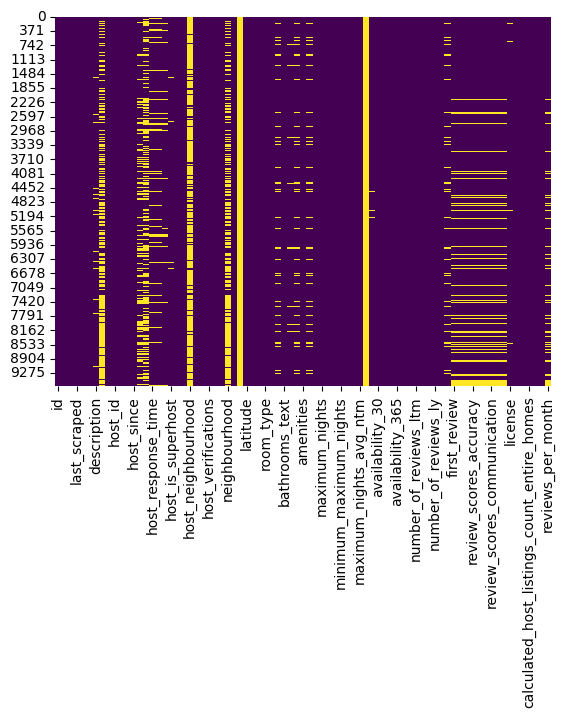

In [701]:
# Visualización de los datos nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [702]:
# --- Corregir dtypes y limpiar columnas clave ---

# Convertir columnas de fecha YYYY-MM-DD datetime
date_cols = ['host_since', 'first_review', 'last_review', 'last_scraped', 'calendar_last_scraped']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Limpiar y convertir 'price' a float
if 'price' in df.columns:
    df['price'] = df['price'].replace(r'[\$,€]', '', regex=True).astype(float)

# Convertir columnas numéricas con posibles nulos
for col in ['bedrooms', 'beds', 'bathrooms', 'estimated_revenue_l365d', 'review_scores_rating',
            'review_scores_location', 'reviews_per_month']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir columnas booleanas (si existen)
bool_map = {'t': True, 'f': False}
for col in ['host_identity_verified', 'instant_bookable', 'has_availability']:
    if col in df.columns:
        df[col] = df[col].map(bool_map)

# verificar los cambios
print("Tipos de datos después de la limpieza:")
print(df.dtypes)

Tipos de datos después de la limpieza:
id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_ti

In [703]:
# Encontrar duplicados exactos
duplicados = df.duplicated()
# Mostrar duplicados
print("Cantidad de filas duplicadas:", duplicados.sum())

Cantidad de filas duplicadas: 0


In [ ]:
# Imprimir las columnas del DataFrame reducido
print("Columnas del DataFrame reducido:")
df.columns

In [ ]:
# Cantidad de nulos en el DataFrame reducido
null_counts = df.isnull().sum()
# Mostrar los conteos de nulos
print("Conteos de nulos en el dataset:")
print(null_counts[null_counts > 0])

In [ ]:
# Completar columa neighbourhood_group con neighbourhood para manterner consistencia con los otros datasets a utilizar
df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood'])

In [ ]:
# Corregir valores nulos en 'price'
# Calcular la media por neighbourhood y room_type
group_means = df.groupby(['neighbourhood', 'room_type'])['price'].transform('mean')
# Rellenar nulos con la media correspondiente
df['price'] = df['price'].fillna(group_means)
# Comprobar si quedan valores nulos en 'price'
print("Nulos en 'price':", df['price'].isnull().sum())

In [ ]:
# Rellenar nulos restantes con la media por neighbourhood
neigh_means = df.groupby('neighbourhood')['price'].transform('mean')
df['price'] = df['price'].fillna(neigh_means)

In [ ]:
# Filtrar filas sin reviews
no_last_review = df[df['last_review'].isnull()]

# Si 'number_of_reviews' = 0 , rellenamos 'first_review' y 'last_review' con 0000-00-00
# Esta operación asegura que las filas con 0 reseñas y sin fecha de última reseña tengan una fecha predeterminada.
df.loc[(df['number_of_reviews'] == 0) & (df['first_review'].isnull()), 'first_review'] = '0000-00-00'
df.loc[(df['number_of_reviews'] == 0) & (df['last_review'].isnull()), 'last_review'] = '0000-00-00'

# Rellenar 'reviews_per_month' 'reviews_per_month' 'review_scores_rating' 'review_scores_location' con 0 si es nulo
# Con esta operación, convertimos los valores nulos en 0 para evitar problemas en análisis posteriores.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)
df['review_scores_location'] = df['review_scores_location'].fillna(0)


In [ ]:
# Calcular 'estimated_revenue_l365d' para filas con nulos
df['estimated_revenue_l365d'] = df['estimated_revenue_l365d'].fillna(
    df['price'] * df['estimated_occupancy_l365d']
)

In [ ]:
# Calcular 'price_per_person' para filas con nulos
df['price_per_person'] = df.apply(
    lambda row: row['price'] / row['accommodates'] if row['accommodates'] > 0 else 0, axis=1
)

In [ ]:
# Cantidad de nulos en el DataFrame reducido
null_counts = df.isnull().sum()
# Mostrar los conteos de nulos
print("Conteos de nulos en el dataset:")
print(null_counts[null_counts > 0])

In [ ]:
# Filter bedrooms with null values and show only columns 'id', 'bedrooms', 'room_type'
df_bedrooms_null = df[df['bedrooms'].isnull()][['id', 'bedrooms', 'room_type']]
# Mostrar las primeras filas del DataFrame con nulos en 'bedrooms'
print("Filas con nulos en 'bedrooms':")
print(df_bedrooms_null.head())

In [ ]:
# Imprimir valores únicos de 'room_type'
print("Valores únicos de 'room_type':")
print(df['room_type'].unique())

In [ ]:
# Filas con 'room_type' = 'Shared room' imprimir valores unicos de 'bedrooms'
print("Valores únicos de 'bedrooms' para 'room_type' = 'Shared room':")
print(df[df['room_type'] == 'Shared room']['bedrooms'].unique())


In [ ]:
# Filas con 'room_type' = 'Private room' imprimir valores unicos de 'bedrooms'
print("Valores únicos de 'bedrooms' para 'room_type' = 'Private room':")
print(df[df['room_type'] == 'Private room']['bedrooms'].unique())

In [ ]:
# Filas con 'room_type' = 'Hotel room' imprimir valores unicos de 'bedrooms'
print("Valores únicos de 'bedrooms' para 'room_type' = 'Hotel room':")
print(df[df['room_type'] == 'Hotel room']['bedrooms'].unique())

In [ ]:
# Rellenar nulos en 'bedrooms' con la media por 'room_type' y 'neighbourhood'
def fill_bedrooms(row):
    if pd.isnull(row['bedrooms']):
        return df.groupby(['room_type', 'neighbourhood'])['bedrooms'].transform('mean')[row.name]
    return row['bedrooms']
df['bedrooms'] = df.apply(fill_bedrooms, axis=1)
# Comprobar si quedan valores nulos en 'bedrooms'
print("Nulos en 'bedrooms' después de rellenar:", df['bedrooms'].isnull().sum())

In [ ]:
# Rellenar resto de nulos en 'bedrooms' con la media por 'room_type'
df['bedrooms'] = df.groupby('room_type')['bedrooms'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
# imprimir nulos en 'beds' con la media por 'room_type', 'bedrooms' y 'neighbourhood'
def fill_beds(row):
    if pd.isnull(row['beds']):
        return df.groupby(['room_type', 'bedrooms', 'neighbourhood'])['beds'].transform('mean')[row.name]
    return row['beds']
df['beds'] = df.apply(fill_beds, axis=1)
# Comprobar si quedan valores nulos en 'beds'
print("Nulos en 'beds' después de rellenar:", df['beds'].isnull().sum())


In [ ]:
# Rellenar resto de nulos en 'beds' con la media por 'room_type'
df['beds'] = df.groupby('room_type')['beds'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Rellenar nulos en 'bathrooms' con la media por 'room_type', 'bedrooms' y 'neighbourhood'
def fill_bathrooms(row):
    if pd.isnull(row['bathrooms']):
        return df.groupby(['room_type', 'bedrooms', 'neighbourhood'])['bathrooms'].transform('mean')[row.name]
    return row['bathrooms']
df['bathrooms'] = df.apply(fill_bathrooms, axis=1)
# Comprobar si quedan valores nulos en 'bathrooms'
print("Nulos en 'bathrooms' después de rellenar:", df['bathrooms'].isnull().sum())

In [ ]:
# Rellenar resto de nulos en 'bathrooms' con la media por 'room_type'
df['bathrooms'] = df.groupby('room_type')['bathrooms'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Rellenar nulos en 'bathrooms_text' con 'no_text'
df['bathrooms_text'] = df['bathrooms_text'].fillna('no_text')

In [ ]:
# Rellenar 'license' con 'Unknown' si es nulo
df['license'] = df['license'].fillna('Unknown')

In [ ]:
# Suma de nulos en el DataFrame reducido
null_counts = df.isnull().sum()

# Mostrar los conteos de nulos
print("Conteos de nulos en el dataset después de limpieza:")
print(null_counts[null_counts > 0])

In [ ]:
# Estadísticas descriptivas del DataFrame reducido
print("Estadísticas descriptivas del DataFrame reducido:")
df.describe()

In [ ]:
# Revisar outliers en 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot de precios')
plt.xlabel('Precio')
plt.show()
# Revisar outliers en 'estimated_revenue_l365d'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['estimated_revenue_l365d'])
plt.title('Boxplot de ingresos estimados anuales')
plt.xlabel('Ingresos estimados anuales')
plt.show()


In [ ]:
# Mostrar outliers en 'price' usando un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histograma de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Imprimir filas con outliers en 'price' > 80000 
outliers_price = df[df['price'] > 80000]
print("Cantidad de filas con outliers en 'price':", outliers_price.shape[0])
print("Filas con outliers en 'price':")
outliers_price[['id', 'host_id', 'room_type', 'price', 'estimated_revenue_l365d']].head(10)


In [ ]:
# Filtrar y mostrar 'estimated_revenue_l365d' < 1
outliers_revenue = df[df['estimated_revenue_l365d'] < 1]
print("Cantidad de filas con outliers en 'estimated_revenue_l365d':", outliers_revenue.shape[0])

# Recalcular estimated revenue_l365d para outliers
df.loc[outliers_revenue.index, 'estimated_revenue_l365d'] = df.loc[outliers_revenue.index, 'price'] * df.loc[outliers_revenue.index, 'estimated_occupancy_l365d']

# Imprimir filas con outliers en 'estimated_revenue_l365d' < 1
print("Filas con outliers en 'estimated_revenue_l365d':")
outliers_revenue[['id', 'host_id', 'room_type', 'price', 'estimated_occupancy_l365d', 'estimated_revenue_l365d']].head(10)

In [ ]:
# Guardar el DataFrame reducido a un nuevo CSV
df.to_csv('/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_ext_cleaned.csv', index=False)

In [ ]:
# Cargar el dataset 'calendar.csv'
df_calendar = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/calendar.csv')
# Mostrar las primeras filas del dataset calendar
print("Primeras filas del dataset calendar:")
df_calendar.head()

In [ ]:
# Cargar el dataset 'reviews.csv'
df_reviews = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/reviews.csv')
# Mostrar las primeras filas del dataset reviews
print("Primeras filas del dataset reviews:")
df_reviews.head()

In [ ]:
# cargar como df la data del archivo 'neighbourhoods.geojson'
# Creando columnas extra si es necesario usando el diccionario que tiene {'type': 'Feature', 'geometry': {'type': 'Mult...
# Polygons', 'coordinates': [[[...]]], 'properties': {...}}
import geopandas as gpd
# Cargar el archivo GeoJSON
df_neighbourhoods = gpd.read_file(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/neighbourhoods.geojson')
# Mostrar las primeras filas del GeoDataFrame
print("Primeras filas del GeoDataFrame neighbourhoods:")
df_neighbourhoods.head()